# Задание лабораторной работы

- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели: одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации); SVM; дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

# Ячейки Jupyter-ноутбука

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные по продажам автомобилей в США. Данный набор доступен по адресу: https://www.kaggle.com/datasets/gagandeep16/car-sales

Набор данных имеет следующие атрибуты:

- Manufacturer - марка
- Model - модель
- Sales_in_thousands - продажи в тысячах
- year_resale_value - годовой объем продаж
- Vehicle_type - тип автомобиля
- Price_in_thousands - цена в тысячах
- Engine_size - объем двигателя
- Horsepower - лошадиные силы
- Wheelbase - колесная база
- Width - ширина
- Length - длина
- Curb_weight - масса
- Fuel_capacity - топливный бак
- Fuel_efficiency - расход топлива
- Latest_Launch - начало производства модели
- Power_perf_factor - мощностной коэффициент

### Импорт библиотек

Импортируем библиотеки с помощью команды import:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим набор данных:

In [2]:
data = pd.read_csv('Car_sales.csv')

## Первичный анализ и обработка данных

Выведем первые 5 строк датасета:

In [3]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


Определим размер датасета:

In [4]:
data.shape

(157, 16)

Определим типы данных:

In [5]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

### Оптимизация данных

Удалим столбцы "Latest_Launch" и "Vehicle_type", так как они не понадобятся для модели:

In [6]:
data = data.drop(columns=['Latest_Launch', 'Vehicle_type'], axis=1)

Убедимся в верном выполнении:

In [7]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [8]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Power_perf_factor      float64
dtype: object

Столбцы "Manufacturer" и "Model" будем кодировать.

### Обработка пропусков

Проверим наличие пропусков:

In [9]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

В датасете наблюдаются пропуски. Удалим строки с пропусками: 

In [10]:
data = data.dropna(axis=0, how='any')

Снова проверим наличие пропусков:

In [11]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

### Кодирование категориальных признаков

Для кодирования столбцов "Manufacturer" и "Model" будем использовать LabelEncoder:

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lemanuf = LabelEncoder()
lemanufarr = lemanuf.fit_transform(data["Manufacturer"])
data["Manufacturer"] = lemanufarr
data = data.astype({"Manufacturer":"float"})

lemod = LabelEncoder()
lemodarr = lemod.fit_transform(data["Model"])
data["Model"] = lemodarr
data = data.astype({"Model":"float"})

Проверим кодирование:

In [14]:
np.unique(lemanufarr), np.unique(lemodarr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]))

И замену в датасете:

In [15]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0.0,62.0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,0.0,107.0,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,0.0,88.0,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.0,4.0,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,1.0,5.0,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


### Разделение выборки на обучающую и тестовую

Разделим выборку с помощью функции train_test_split:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, data.__year_resale_value, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((87, 14), (87,), (30, 14), (30,))

## Обучение моделей

### Линейная модель регрессии

Построим корреляционную матрицу для выявления линейной зависимости:

<AxesSubplot:>

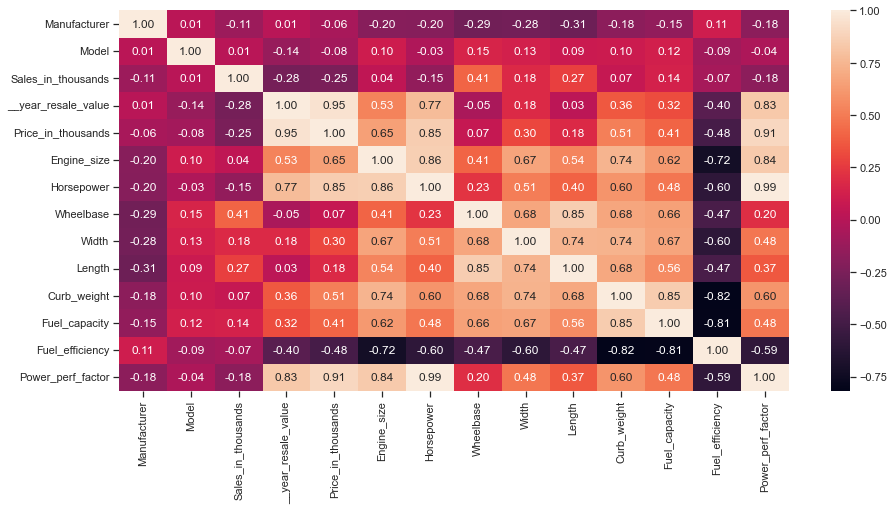

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='Price_in_thousands', ylabel='__year_resale_value'>

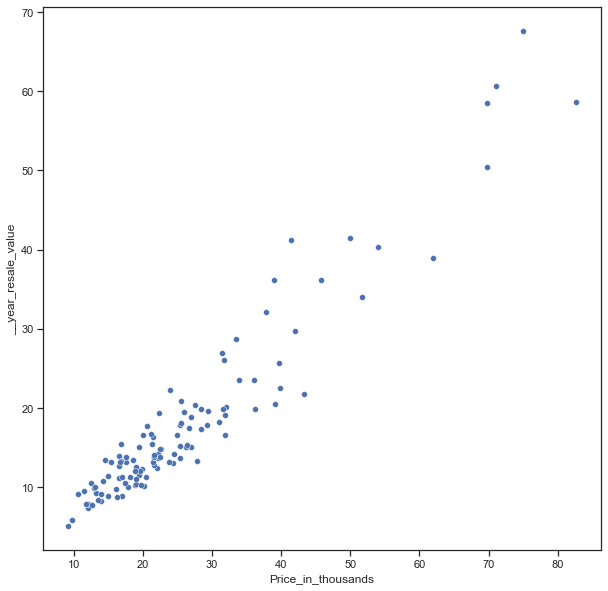

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Price_in_thousands', y='__year_resale_value', data=data)

Между признаками "Price_in_thousands" и "year_resale_value" прослеживается линейная зависимость (коэффициент корреляции = 0.95).

#### Аналитическое вычисление коэффициентов регрессии

In [21]:
from typing import Dict, Tuple

In [22]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [23]:
x_array = data['Price_in_thousands'].values
y_array = data['__year_resale_value'].values

Коэффициенты регрессии:

In [24]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-2.3050406269840487, 0.7830951357632508)

Отрисовка зависимости:

In [25]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [26]:
regr_a = y_regr(x_array, b0, b1)

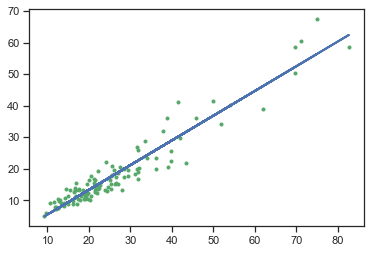

In [27]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, regr_a, 'b', linewidth=2.0)
plt.show()

#### Метод наименьших квадратов

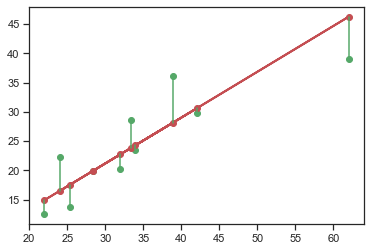

In [28]:
K_mnk=10

plt.plot(x_array[1:K_mnk+1], y_array[1:K_mnk+1], 'go')
plt.plot(x_array[1:K_mnk+1], regr_a[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(x_array[1:K_mnk+1])):
    x1 = x_array[1:K_mnk+1][i]
    y1 = y_array[1:K_mnk+1][i]
    y2 = regr_a[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'g-')

plt.show()

Зеленые отрезки - ошибки между истинными и предсказанными значениями.

#### Решение задачи оптимизации - градиентный спуск

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        y_pred = b1 * x_array + b0
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred

In [31]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(regr_a, grad_y_pred)))
    plt.plot(x_array, y_array, 'g.')
    plt.plot(x_array, regr_a, 'b', linewidth=2.0)
    plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = -2.3050406269840487 - (теоретический), 0.03606307692307693 - (градиентный спуск)
b1 = 0.7830951357632508 - (теоретический), 1.2474327075213676 - (градиентный спуск)
MSE = 250.15077233076002


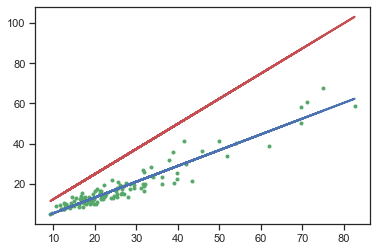

In [32]:
show_gradient_descent(1, 0, 0)

Добьемся сходимости алгоритма путем задания других коэффициентов:

b0 = -2.3050406269840487 - (теоретический), -2.3021578094008817 - (градиентный спуск)
b1 = 0.7830951357632508 - (теоретический), 0.7830093489274242 - (градиентный спуск)
MSE = 1.889852950340935e-06


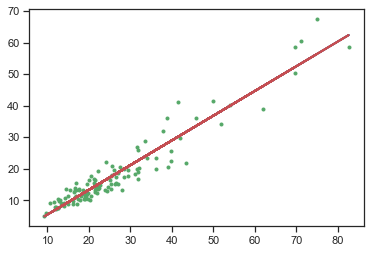

In [33]:
show_gradient_descent(100, -2.98, -22)

#### Подбор коэффициентов через LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression

Коэффициенты, полученные с использованием LinearRegression:

In [35]:
regr1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, regr1.coef_), (b0, regr1.intercept_)

((0.7830951357632508, array([[0.78309514]])),
 (-2.3050406269840487, array([-2.30504063])))

Линейная модель:

In [36]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

#### Стохастический градиентный спуск с использованием SGDRegressor

In [37]:
from sklearn.linear_model import SGDRegressor

Коэффициенты, найденные с использованием SGDRegressor:

In [38]:
regr2 = SGDRegressor().fit(x_array.reshape(-1, 1), y_array)
(b1, regr2.coef_), (b0, regr2.intercept_)

((0.7830951357632508, array([82158015.08392689])),
 (-2.3050406269840487, array([-2.05760176e+09])))

Линейная модель, построенная в этом случае:

In [39]:
model2 = SGDRegressor()
model2.fit(X_train, y_train)

SGDRegressor()

#### L1-регуляризация линейной модели

In [40]:
from sklearn.linear_model import Lasso

Коэффициенты, полученные с использованием Lasso:

In [41]:
regr3 = Lasso().fit(x_array.reshape(-1, 1), y_array)
(b1, regr3.coef_), (b0, regr3.intercept_)

((0.7830951357632508, array([0.77805742])),
 (-2.3050406269840487, -2.174213796155911))

Линейная модель:

In [42]:
model3 = Lasso()
model3.fit(X_train, y_train)

Lasso()

### SVM модель

Будем использовать класс SVR для решения задачи регрессии методом опорных векторов:

In [43]:
from sklearn.svm import SVR

Модель SVM:

In [44]:
regr4 = SVR(kernel='linear', C=1.0)
model4 = regr4.fit(X_train, y_train)

### Дерево решений

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3:

In [47]:
regr5 = DecisionTreeRegressor(max_depth=3)
model5 = regr5.fit(X_train, y_train)

Выведем основную статистику для дерева:

In [48]:
stat_tree(model5)

Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0


И с глубиной = 5:

In [49]:
regr6 = DecisionTreeRegressor(max_depth=5)
model6 = regr6.fit(X_train, y_train)

In [50]:
stat_tree(model6)

Всего узлов: 51
Листовых узлов: 26
Глубина дерева: 5
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 4.8076923076923075


Визуализация деревьев, а также их правила представлены в пункте 6.

## Оценка качества моделей с помощью двух метрик. Сравнение качества.

Оценивать качество регрессии будем при помощи двух метрик - средней абсолютной ошибки (Mean Absolute Error) и медианной абсолютной ошибки (Median Absolute Error):

In [51]:
from sklearn.metrics import mean_absolute_error, median_absolute_error 

In [52]:
err1 = []
err2 = []

Сформируем функцию для оценивания:

In [53]:
def rate_model(model):
    print("Средняя абсолютная ошибка:",
          mean_absolute_error(y_test, model.predict(X_test)))
    err1.append(mean_absolute_error(y_test, model.predict(X_test)))
    print("Медианная абсолютная ошибка:",
          median_absolute_error(y_test, model.predict(X_test)))
    err2.append(median_absolute_error(y_test, model.predict(X_test)))

In [54]:
rate_model(model1)

Средняя абсолютная ошибка: 3.4017233474514794e-14
Медианная абсолютная ошибка: 1.7763568394002505e-14


In [55]:
rate_model(model2)

Средняя абсолютная ошибка: 80507271514358.05
Медианная абсолютная ошибка: 74917417038388.1


In [56]:
rate_model(model3)

Средняя абсолютная ошибка: 0.11061266741068003
Медианная абсолютная ошибка: 0.08038352323471276


In [57]:
rate_model(model4)

Средняя абсолютная ошибка: 0.04773643904175788
Медианная абсолютная ошибка: 0.031832622636447816


In [58]:
rate_model(model5)

Средняя абсолютная ошибка: 1.4483803921568623
Медианная абсолютная ошибка: 1.372023172905526


In [59]:
rate_model(model6)

Средняя абсолютная ошибка: 1.0188329365079365
Медианная абсолютная ошибка: 0.35964285714285804


Чем ближе значение средней абсолютной ошибки и медианной абсолютной ошибки к нулю, тем лучше качество регрессии.

Самая лучшая по качеству по обоим метрикам - первая модель, полученная при помощи LinearRegression, а худшая - полученная через SGDRegressor.

Визуальное представление оценки:

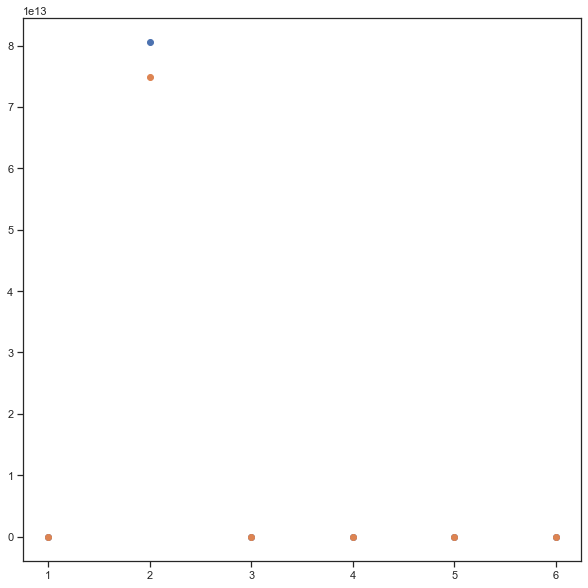

In [60]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter([1, 2, 3, 4, 5, 6], err1)
plt.scatter([1, 2, 3, 4, 5, 6], err2)

In [61]:
err1.pop(1)
err2.pop(1)

74917417038388.1

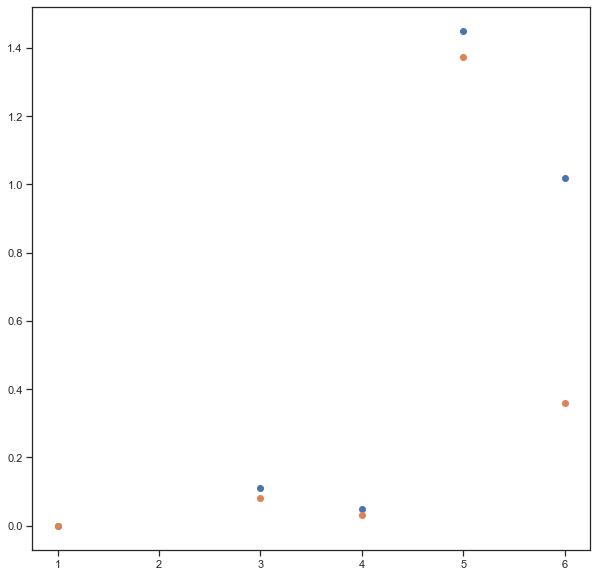

In [62]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter([1, 3, 4, 5, 6], err1)
plt.scatter([1, 3, 4, 5, 6], err2)

## График важности признаков в дереве решений

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева:

In [63]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

Проверим для модели с глубиной = 3:

In [64]:
list(zip(data.columns.values, model5.feature_importances_))

[('Manufacturer', 0.0),
 ('Model', 0.0),
 ('Sales_in_thousands', 0.0),
 ('__year_resale_value', 0.9004981695348581),
 ('Price_in_thousands', 0.0937065235951151),
 ('Engine_size', 0.0),
 ('Horsepower', 0.005795306870026813),
 ('Wheelbase', 0.0),
 ('Width', 0.0),
 ('Length', 0.0),
 ('Curb_weight', 0.0),
 ('Fuel_capacity', 0.0),
 ('Fuel_efficiency', 0.0),
 ('Power_perf_factor', 0.0)]

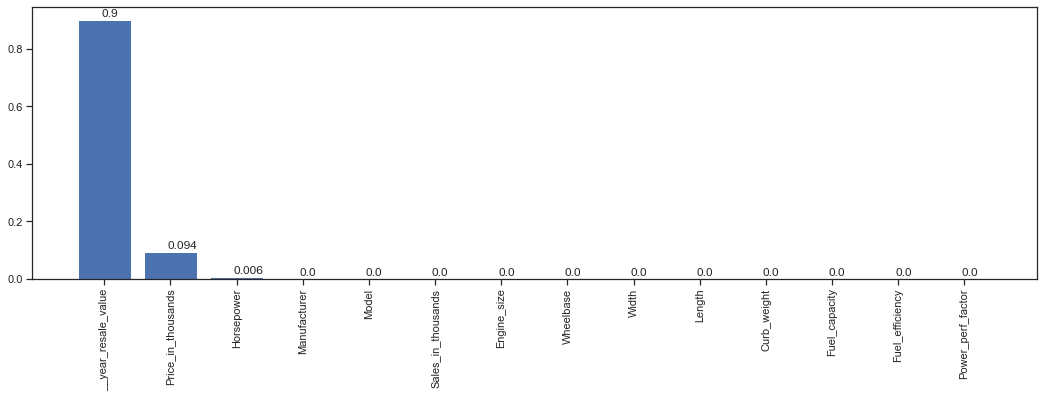

In [65]:
car_tree_cl_fl_1, car_tree_cl_fd_1 = draw_feature_importances(model5, data)

И для модели с глубиной = 5:

In [66]:
list(zip(data.columns.values, model6.feature_importances_))

[('Manufacturer', 0.00020093402747307427),
 ('Model', 0.0),
 ('Sales_in_thousands', 0.0),
 ('__year_resale_value', 0.989641034969228),
 ('Price_in_thousands', 0.00024376219929795527),
 ('Engine_size', 0.0006356225606536819),
 ('Horsepower', 0.0),
 ('Wheelbase', 0.002016525370954842),
 ('Width', 0.005687357709785044),
 ('Length', 0.0),
 ('Curb_weight', 0.0),
 ('Fuel_capacity', 0.001369800482921066),
 ('Fuel_efficiency', 0.0),
 ('Power_perf_factor', 0.0002049626796864563)]

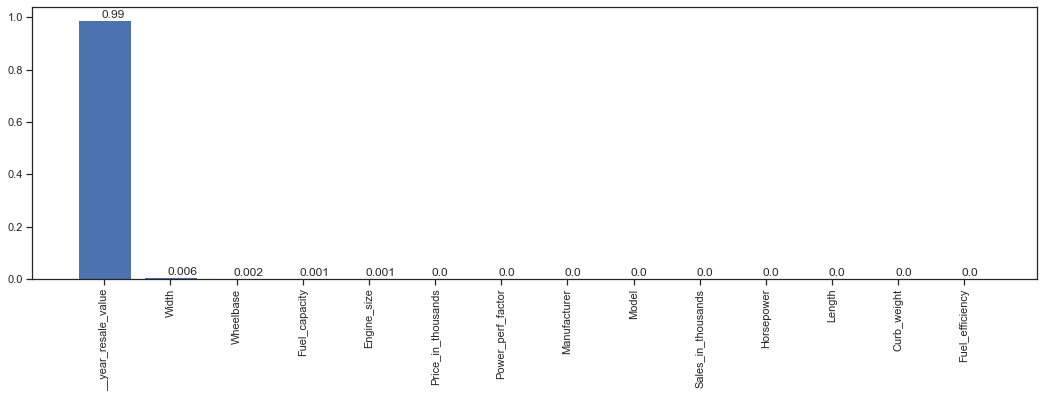

In [67]:
car_tree_cl_fl_2, car_tree_cl_fd_ = draw_feature_importances(model6, data)

## Визуализация деревьев решений и его правила

In [68]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

### Визуализация деревьев

In [69]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Визуализируем дерево с глубиной = 3:

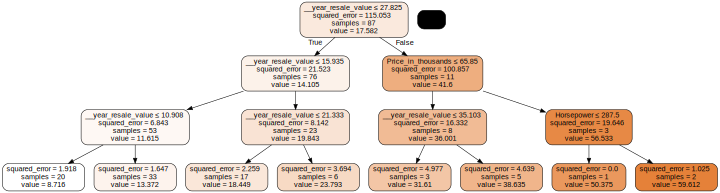

In [70]:
dot_data = export_graphviz(model5, out_file=None, 
                           feature_names=data.columns, 
                           class_names=data.__year_resale_value, 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

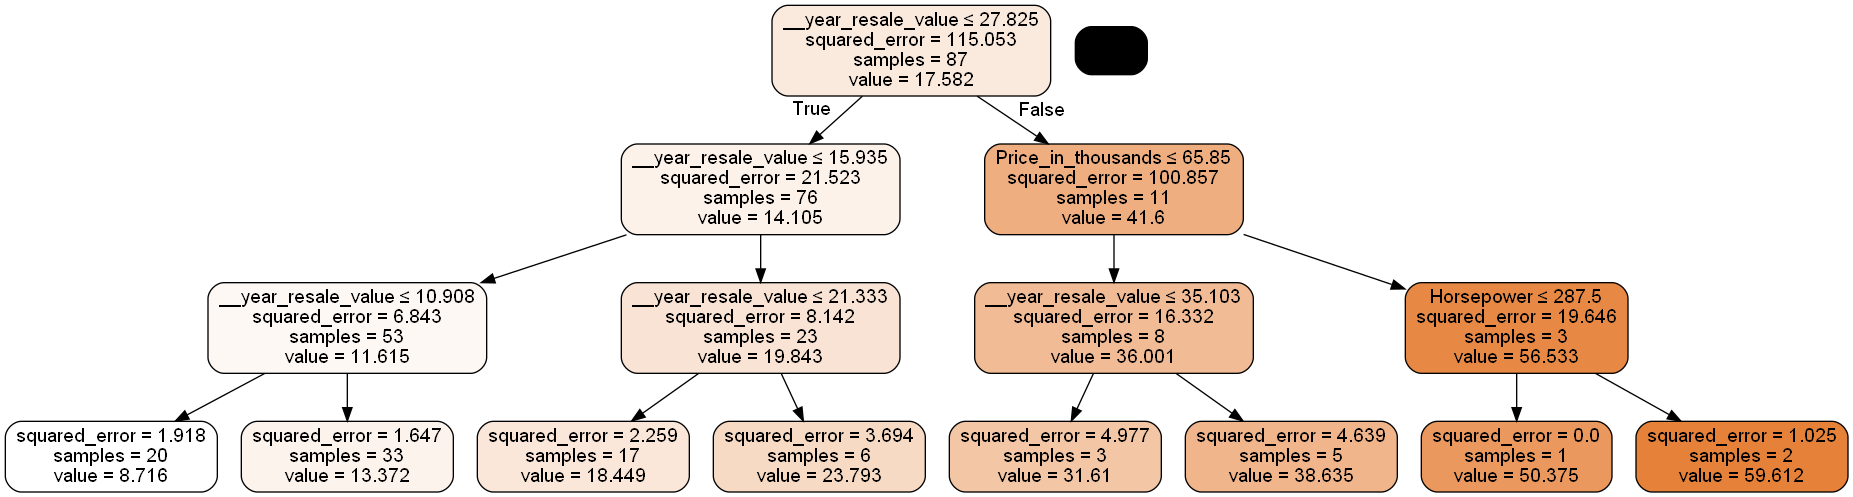

In [71]:
Image(get_png_tree(model5, data.columns), height='100%')

И с глубиной = 5:

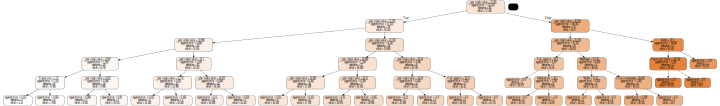

In [72]:
dot_data = export_graphviz(model6, out_file=None, 
                           feature_names=data.columns, 
                           class_names=data.__year_resale_value, 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

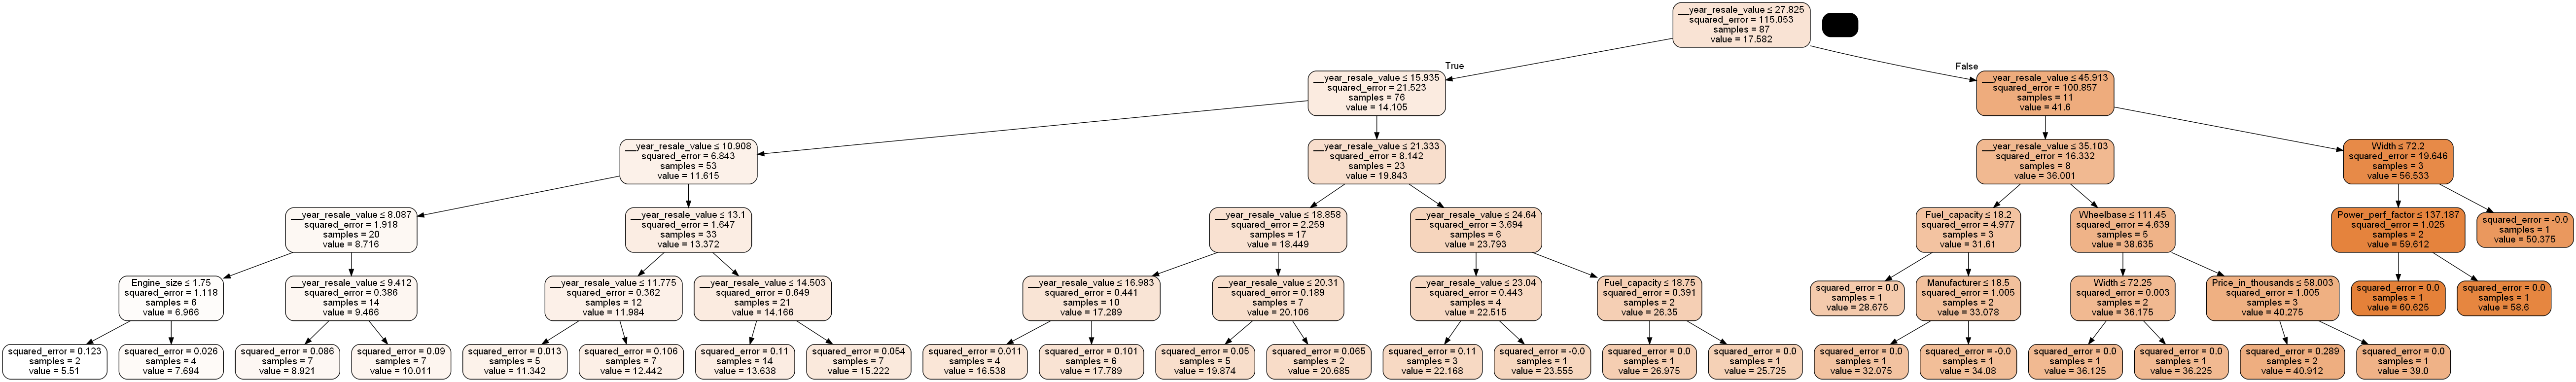

In [73]:
Image(get_png_tree(model6, data.columns), height='100%')

### Вывод правил дерева

Выведем правила для дерева с глубиной = 3:

In [74]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model5, feature_names=list(data.columns))
HTML('<pre>' + tree_rules + '</pre>')

И для дерева с глубиной = 5:

In [75]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model6, feature_names=list(data.columns))
HTML('<pre>' + tree_rules + '</pre>')